<a href="https://colab.research.google.com/github/themathedges/3YP-Standalone-Kennington/blob/main/Ravi/Old_regression/Model_5_Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 5: Multivariate Regression (Daily)

**Author:** Ravi Kohli

**Date:** January 5th, 2021

**College:** Christ Church

**Goal:**
- To make a very simple multivariate linear regression monthly model to forecast the future generation profile of Sandford Hydro

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr
import pickle
from sklearn.linear_model import LinearRegression

## Collecting the Data

### Defining the Mask

In [ ]:
# extract the rows that we want by using a mask
# format of mask: YYYY-MM-DD
model_5_current_mask_start = pd.to_datetime('2018-12-01')
model_5_current_mask_end = pd.to_datetime('2019-10-22')

### Daily Current Generation

In [ ]:
# unpickle the processed daily generation dataframe
path = '/content/drive/My Drive/3YP/data/'
filename = 'daily_sandford_generation_data'
infile = open(path+filename, 'rb')
sandford_daily_df = pickle.load(infile)
infile.close()

In [ ]:
sandford_daily_df

,Reading Date,Incremental Reading,Meter Reading
0,2019-10-22,1284.10,1763145.53
1,2019-10-21,1175.01,1761861.43
2,2019-10-20,1175.01,NaN
3,2019-10-19,1175.01,NaN
4,2019-10-18,2265.09,1758336.41
...,...,...,...
364,2018-10-22,0.00,548149.91
365,2018-10-21,0.00,548149.91
366,2018-10-20,0.00,548149.91
367,2018-10-19,0.00,548149.91


In [ ]:
model_5_gen_current_mask = (sandford_daily_df['Reading Date'] >= model_5_current_mask_start) & (sandford_daily_df['Reading Date'] <= model_5_current_mask_end)

# extract the rows from the dataframe by using the mask
sandford_gen_df = sandford_daily_df.loc[model_5_gen_current_mask]

In [ ]:
sandford_gen_df

,Reading Date,Incremental Reading,Meter Reading
0,2019-10-22,1284.100,1763145.53
1,2019-10-21,1175.010,1761861.43
2,2019-10-20,1175.010,NaN
3,2019-10-19,1175.010,NaN
4,2019-10-18,2265.090,1758336.41
...,...,...,...
320,2018-12-05,12.493,551201.08
321,2018-12-04,0.000,551188.58
322,2018-12-03,0.000,551188.58
323,2018-12-02,2.765,551188.58


### Daily Precipitation

In [ ]:
# unpickle the current precipitation daily dataframe
path = '/content/drive/My Drive/3YP/data/'
filename = 'radcliffe_daily_precipitation_data_processed'
infile = open(path+filename, 'rb')
precipitation_daily_df = pickle.load(infile)
infile.close()

In [ ]:
model_5_precip_current_mask = (precipitation_daily_df['Date'] >= model_5_current_mask_start) & (precipitation_daily_df['Date'] <= model_5_current_mask_end)

# extract the rows from the dataframe by using the mask
precipitation_current_df = precipitation_daily_df.loc[model_5_precip_current_mask]

### Daily Temperature data

In [ ]:
# unpickle the temperature daily dataframe
path = '/content/drive/My Drive/3YP/data/'
filename = 'radcliffe_daily_temperature_data_processed'
infile = open(path+filename, 'rb')
temperature_daily_df = pickle.load(infile)
infile.close()

In [ ]:
model_5_temp_current_mask = (temperature_daily_df['Date'] >= model_5_current_mask_start) & (temperature_daily_df['Date'] <= model_5_current_mask_end)

# extract the rows from the dataframe by using the mask
temp_current_df = temperature_daily_df.loc[model_5_temp_current_mask]

### Future Precipitation data

In [ ]:
# unpickle the future temperature dataframe
path = '/content/drive/My Drive/3YP/data/met_office/'
filename = 'precip_2242_met_daily' 
infile = open(path+filename, 'rb')
precipitation_future_df = pickle.load(infile)
infile.close()

In [ ]:
# extract the rows that we want by using a mask
# format of mask: YYYY-MM-DD
model_5_future_mask_start = pd.to_datetime('2050-01-01')
model_5_future_mask_end = pd.to_datetime('2050-12-31')

In [ ]:
model_5_precip_future_mask = (precipitation_future_df['Date'] >= model_5_future_mask_start) & (precipitation_future_df['Date'] <= model_5_future_mask_end)

# extract the rows from the dataframe by using the mask
precipitation_future = precipitation_future_df.loc[model_5_precip_future_mask]

In [ ]:
precipitation_future

,Date,Precipitation Rate
24870,2050-01-01,10.622042
24871,2050-01-02,26.987028
24872,2050-01-03,11.353615
24873,2050-01-04,0.251311
24874,2050-01-05,1.852849
...,...,...
25225,2050-12-26,0.000615
25226,2050-12-27,5.991373
25227,2050-12-28,4.328137
25228,2050-12-29,0.100387


### Future Temperature Data

In [ ]:
# unpickle the future temperature dataframe
path = '/content/drive/My Drive/3YP/data/met_office/'
filename = 'temp_2242_met_daily'
infile = open(path+filename, 'rb')
temperature_future_df = pickle.load(infile)
infile.close()

In [ ]:
temperature_future_df

,Date,Temperature
0,1980-12-01,-0.965012
1,1980-12-02,-0.719904
2,1980-12-03,0.271304
3,1980-12-04,-5.000383
4,1980-12-05,-3.902606
...,...,...
25225,2050-12-26,8.359898
25226,2050-12-27,8.109031
25227,2050-12-28,7.250457
25228,2050-12-29,7.026456


In [ ]:
model_5_temp_future_mask = (temperature_future_df['Date'] >= model_5_future_mask_start) & (temperature_future_df['Date'] <= model_5_future_mask_end)

# extract the rows from the dataframe by using the mask
temperature_future = temperature_future_df.loc[model_5_temp_future_mask]

## Multivariate Regression Analysis

In [ ]:
model_5 = LinearRegression()

In [ ]:
sandford_daily_df.tail(50)

,Reading Date,Incremental Reading,Meter Reading
319,2018-12-06,713.933,551915.01
320,2018-12-05,12.493,551201.08
321,2018-12-04,0.000,551188.58
322,2018-12-03,0.000,551188.58
323,2018-12-02,2.765,551188.58
324,2018-12-01,1272.220,551185.82
325,2018-11-30,1440.100,549913.60
326,2018-11-29,0.000,548473.50
327,2018-11-28,0.000,548473.50
328,2018-11-27,0.000,548473.50


In [ ]:
# note the indexing as we need to exclude november and start the data as december
model_5_train_df = pd.DataFrame([precipitation_current_df['Date']]).T
model_5_train_df['Mean_temp'] = temp_current_df['Daily Tmean °C']
model_5_train_df['Total_precip'] = precipitation_current_df['Rainfall mm 1 dpl no traces']

In [ ]:
set(model_5_train_df['Date']) - set(sandford_gen_df['Reading Date'])

{Timestamp('2019-06-01 00:00:00')}

In [ ]:
# now we want to exclude the row whose date isn't in the generation data
model_5_train = model_5_train_df[model_5_train_df['Date'] != '2019-06-01 00:00:00']

In [ ]:
model_5_train['Total_monthly_generation'] = sandford_gen_df['Incremental Reading'].values[::-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temperature_future

,Date,Temperature
24870,2050-01-01,12.811341
24871,2050-01-02,11.466982
24872,2050-01-03,11.742976
24873,2050-01-04,5.330974
24874,2050-01-05,2.696981
...,...,...
25225,2050-12-26,8.359898
25226,2050-12-27,8.109031
25227,2050-12-28,7.250457
25228,2050-12-29,7.026456


In [ ]:
# get the training features and target vector
x_train = model_5_train[['Mean_temp', 'Total_precip']]
y_train = model_5_train['Total_monthly_generation']

In [ ]:
# form the testing data dataframe
model_5_test_df = temperature_future[['Date', 'Temperature']]
model_5_test_df['Future_precip'] = precipitation_future['Precipitation Rate']

In [ ]:
model_5_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 24870 to 25229
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           358 non-null    datetime64[ns]
 1   Temperature    358 non-null    float64       
 2   Future_precip  358 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 11.2 KB


In [ ]:
model_5.fit(x_train, y_train)
print(model_5.intercept_, model_5.coef_)

8507.727072270478 [-397.09240864  -33.33649143]


In [ ]:
# make predictions on the future
y_pred = model_5.predict(model_5_test_df[['Temperature', 'Future_precip']])

In [ ]:
y_pred_corrected = [max(i, 0) for i in y_pred]
model_5_test_df['Predicted generation'] = y_pred_corrected
model_5_test_df['Generation rolling average'] = model_5_test_df['Predicted generation'].rolling(10).mean()
print(sum(y_pred_corrected))

1198475.052355905


In [ ]:
(1198475.052355905 - 1211960)/1211960 * 100

-1.112656163907632

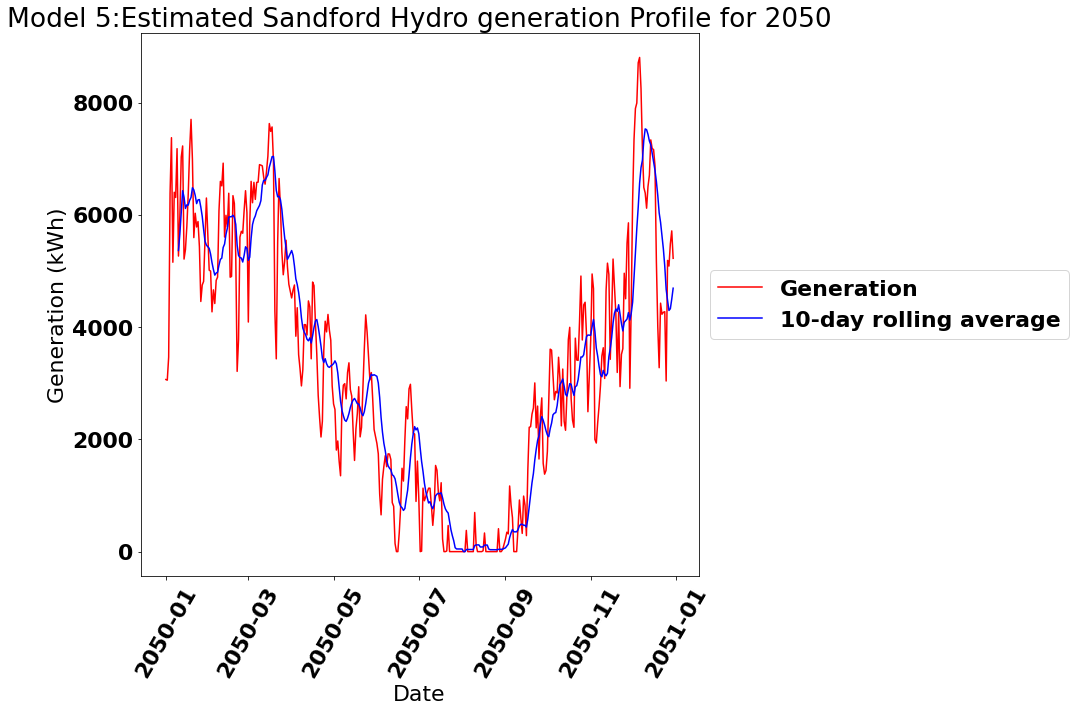

In [ ]:
# Let us plot the generation profile
gen_fig, gen_ax = plt.subplots(figsize = (10, 10))
gen_ax.tick_params(axis='x', rotation=60)
gen_ax.plot(temperature_future['Date'], model_5_test_df['Predicted generation'], 'r', label = 'Generation')  
gen_ax.plot(temperature_future['Date'], model_5_test_df['Generation rolling average'], 'b', label = '10-day rolling average')  
gen_ax.set(title = 'Model 5:Estimated Sandford Hydro generation Profile for 2050', xlabel= 'Date', ylabel='Generation (kWh)')
gen_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)